# Тестирование графика числового фактора против регрессионного таргета

In [1]:
# расширяем поле, убираем предупреждения
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:95% !important;}</style>'))

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Стандартные библиотеки для анализа
import pandas as pd
import numpy as np

import sys
sys.path.append('../')

# Наша разработанная библиотека
from autobinary import TargetPlot

In [3]:
import sklearn as sk
import xgboost as xgb
import matplotlib as mplot
import autobinary as ab

print('sklearn: ', sk.__version__)
print('xgboost: ', xgb.__version__)
print('matplotlib: ', mplot.__version__)
print('autobinary: ', ab.__version__)

sklearn:  0.24.2
xgboost:  1.5.2
matplotlib:  3.1.0
autobinary:  1.0.4


In [4]:
sample = pd.read_csv('../data/train_houseprice.csv')

print('Размерность данных:', sample.shape)
sample.head(2)

Размерность данных: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


==================== Отрисовка для фактора LotArea ====================


,index,LotArea,mean_target,all_count
0,0,"(1283.9, 2910.0]",124667.272727,55
1,1,"(2910.0, 4520.0]",156328.000000,76
2,2,"(4520.0, 6130.0]",134027.511111,90
3,3,"(6130.0, 7740.0]",145317.066667,165
4,4,"(7740.0, 9350.0]",159067.080247,324
5,5,"(9350.0, 10960.0]",180771.060403,298
6,6,"(10960.0, 12570.0]",211651.479592,196
7,7,"(12570.0, 14180.0]",232124.460000,100
8,8,"(14180.0, 15790.0]",280979.588235,51
9,9,"(15790.0, 17400.0]",225835.031250,32


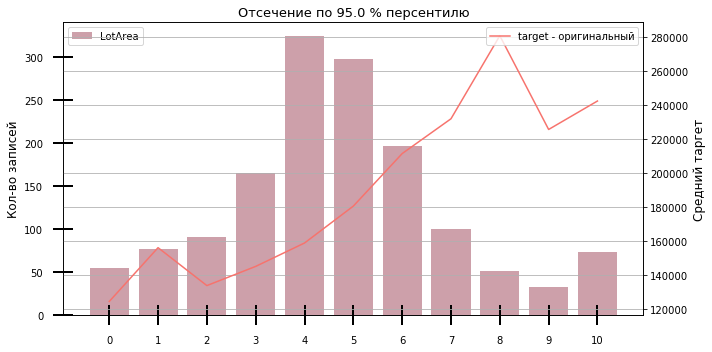

In [5]:
tt = TargetPlot(sample=sample, feature='LotArea', target = 'SalePrice', 
                type_target = 'reg', bins=10, right_quant=0.05)

tt.get_target_plot()